# 1. Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Importing and visualizing data

### 2.1 Original features

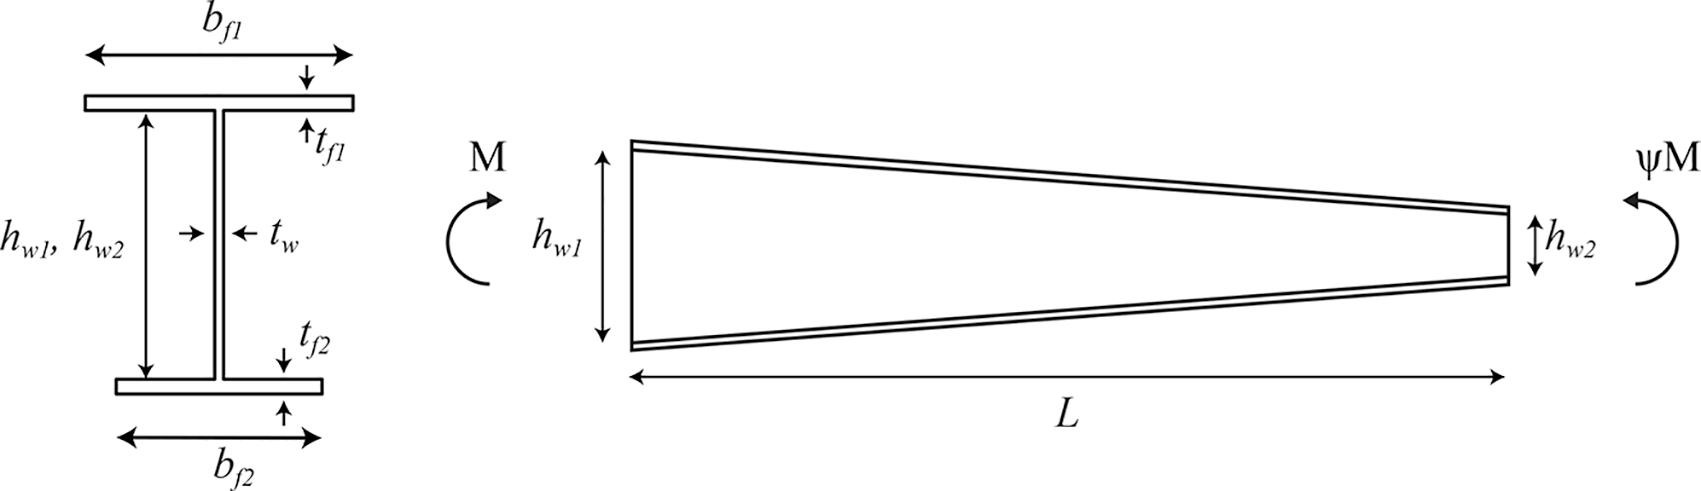

In [30]:
from IPython import display
display.Image("1-s2.0-S2352012422004581-gr4_lrg.jpg")

In [3]:
df = pd.read_csv("training_set.csv", sep=';')
df.head()

,hw1,hw2,tw,bf1,tf1,bf2,tf2,psi,L,y
0,500,167,2.09,500,17.89,375,13.42,-0.75,19000,1703.681777
1,700,280,4.75,525,34.26,700,40.53,-0.75,28000,6745.446061
2,400,400,1.67,100,6.89,300,18.47,0.75,8000,143.526934
3,160,400,3.43,200,9.37,100,6.89,-0.25,7200,145.486862
4,100,400,1.33,300,15.16,300,4.11,1.00,5600,643.674997


In [3]:
df.info()

# All the variables are floats or integers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60549 entries, 0 to 60548
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hw1     60549 non-null  int64  
 1   hw2     60549 non-null  int64  
 2   tw      60549 non-null  float64
 3   bf1     60549 non-null  int64  
 4   tf1     60549 non-null  float64
 5   bf2     60549 non-null  int64  
 6   tf2     60549 non-null  float64
 7   psi     60549 non-null  float64
 8   L       60549 non-null  int64  
 9   y       60549 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 4.6 MB


In [11]:
df.describe()

,hw1,hw2,tw,bf1,tf1,bf2,tf2,psi,L,y
count,60549.000000,60549.000000,60549.000000,60549.000000,60549.000000,60549.000000,60549.000000,60549.000000,60549.000000,60549.000000
mean,536.317809,437.315678,7.257409,384.527820,19.023638,393.461907,19.060153,0.022969,14916.890452,6213.193798
std,268.527574,265.360820,8.032689,236.838237,14.176724,239.568008,14.145259,0.639762,9020.650939,18492.627003
min,75.000000,75.000000,1.000000,75.000000,1.000000,75.000000,1.000000,-1.000000,600.000000,0.202016
25%,300.000000,225.000000,2.600000,200.000000,8.160000,200.000000,8.210000,-0.500000,8000.000000,241.607111
50%,500.000000,360.000000,4.190000,300.000000,14.920000,350.000000,15.110000,0.000000,13000.000000,1184.808261
75%,800.000000,600.000000,8.130000,525.000000,26.640000,525.000000,26.640000,0.500000,20800.000000,4845.989135
max,1000.000000,1000.000000,40.000000,1000.000000,80.000000,1000.000000,80.000000,1.000000,40000.000000,806819.125200


In [4]:
df.isnull().sum()

# there are no NaN values

hw1    0
hw2    0
tw     0
bf1    0
tf1    0
bf2    0
tf2    0
psi    0
L      0
y      0
dtype: int64

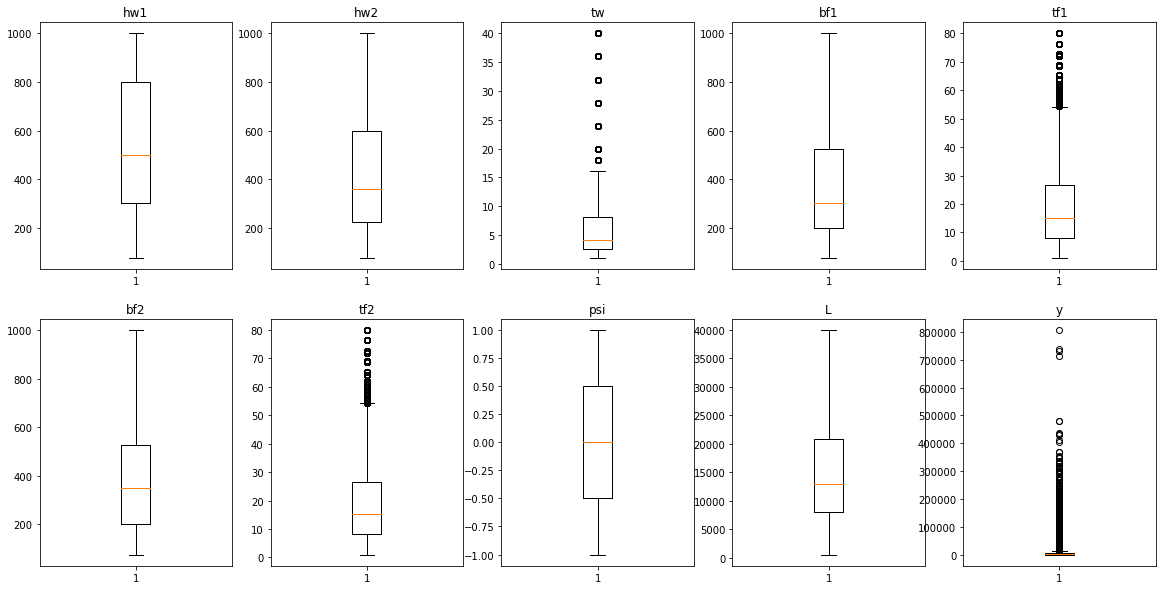

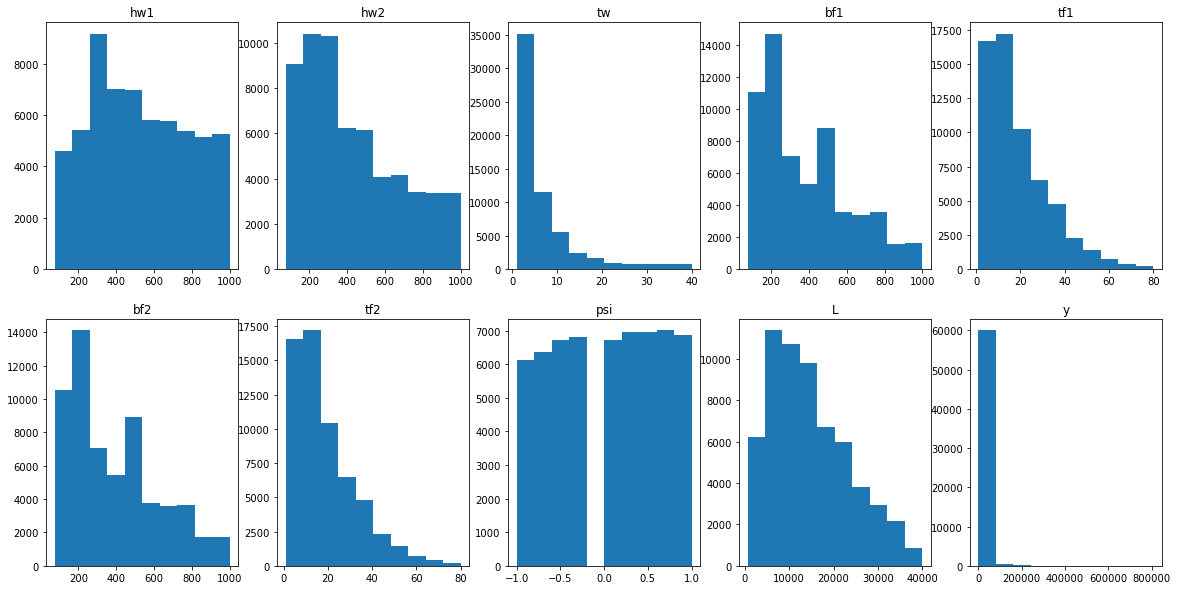

In [25]:
# Boxplots
plt.figure(figsize=(20,10))
for i in range(len(df.columns)):
    plt.subplot(2,5,i+1)
    plt.boxplot(df.iloc[:,i])
    plt.title(df.columns[i])

# Histograms
plt.figure(figsize=(20,10))
for i in range(len(df.columns)):
    plt.subplot(2,5,i+1)
    plt.hist(df.iloc[:,i])
    plt.title(df.columns[i])

### 2.2 Generated features

</br>Taper ratio
- $h_{w, max}/h_{w, min}$

</br>Flange width ratio
- $b_{f1}/b_{f2}$

</br>Height to width ratio
- $h_{w, max}/b_{f, max}$

</br>Beam length
- $L/h_{w, max}$

</br>Plate thickness ratio
- $t_{f1}/t_{w}; t_{f2}/t_{w}$

</br>Flange slenderness
- $b_{f1}/t_{f1}; b_{f2}/t_{fs}$

</br>Web slenderness
- $h_{w, max}/t_{w}$;

In [42]:
df.columns

Index(['hw1', 'hw2', 'tw', 'bf1', 'tf1', 'bf2', 'tf2', 'psi', 'L', 'y'], dtype='object')

In [13]:
def df_extend(df):
    df_extended = df.copy()

    # creating new features
    df_extended["taper_ratio"] = df[["hw1","hw2"]].max(axis=1) / df[["hw1","hw2"]].min(axis=1)
    df_extended["flange_width_ratio"] = df.bf1 / df.bf2
    df_extended["height_to_width_ratio"] = df[["hw1","hw2"]].max(axis=1) / df[["bf1","bf2"]].max(axis=1)
    df_extended["beam_length"] = df.L / df[["hw1","hw2"]].max(axis=1)
    df_extended["plate_thickness_ratio_1"] = df.tf1 / df.tw
    df_extended["plate_thickness_ratio_2"] = df.tf2 / df.tw
    df_extended["flange_slenderness_1"] = df.bf1 / df.tf1
    df_extended["flange_slenderness_2"] = df.bf2 / df.tf2
    df_extended["web_slenderness"] = df[["hw1", "hw2"]].max(axis=1) / df.tw

    # change y position
    y_aux = df_extended.y
    df_extended = df_extended.drop(columns="y")
    df_extended["y"] = y_aux

    return df_extended

df_extended = df_extend(df)

# 3. Try

In [59]:
X = df.drop(columns="y")
y = df.y

from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler().fit_transform(X)


In [63]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
X_poly_feat = poly.fit_transform(X_scale)
X_poly_feat.shape

(60549, 220)